# Formulating the ideas and getting the data

- OIGA DESMUNZAR POR REGION! Y ENTRAS A ANALIZAR LAS DOS MAYORES REGIONES
- Ranking las 30 más portwfolio weight
- IGUAL POR INDUSTRY! vamos  a analizar por industria las dos industrias

Luego al final la ESG, que pues 
Could be like: 
Analyze the voting on Sustainability reasons of the 5 biggest in Europe and 5 biggest in USA on meetings this year so far. Analyze the ESG of those. And also the performance related decisions

Are the companie's top investments differing a lot from the Fund's voting criteria, specially the ESG?

haz gráficos generales de distribución primero

2.agrupas por sectores, 

- OIGA DESMUNZAR POR REGION! Y ENTRAS A ANALIZAR LAS DOS MAYORES REGIONES
- IGUAL POR INDUSTRY!
quitando estados unidos, cómo es la distribución?
Luego, le preguntas al chat cómo hacer de esto algo sobre ESG

The data as of 30/06/2025

# Objectives of the exploration
1. Find which sector concentrated the majority of the investments of the fund in relative and total terms as of 30/06/2025
2. Find the top 30 companies with the highest Vote % in total
3. Top 10 Highest market value per industry &  per region
4. Top 10 tech companies the fund has more money invested in tech in Europe and the US
4. Check the decisions 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
print(os.getcwd())


c:\Users\Jose Fernando Barros\the_fund


In [184]:
df= pd.read_excel('EQ_2024_Industry.xlsx')


#  Cleaning

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Industry               8659 non-null   object 
 1   Region                 8659 non-null   object 
 2   Country                8659 non-null   object 
 3   Name                   8659 non-null   object 
 4   Market Value(NOK)      8659 non-null   int64  
 5   Market Value(USD)      8659 non-null   int64  
 6   Voting                 8313 non-null   float64
 7   Ownership              8659 non-null   float64
 8   Incorporation Country  8659 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 609.0+ KB


In [186]:
df.head(3)

,Industry,Region,Country,Name,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country
0,Basic Materials,Asia,India,Aarti Industries Ltd,93873366,8265429,0.48,0.48,India
1,Basic Materials,Europe,Lithuania,AB Grigeo,28461548,2506003,1.75,1.75,Lithuania
2,Basic Materials,Europe,Spain,Acerinox SA,502249400,44222411,1.81,1.81,Spain


In [187]:
df.isna().sum()

Industry                   0
Region                     0
Country                    0
Name                       0
Market Value(NOK)          0
Market Value(USD)          0
Voting                   346
Ownership                  0
Incorporation Country      0
dtype: int64

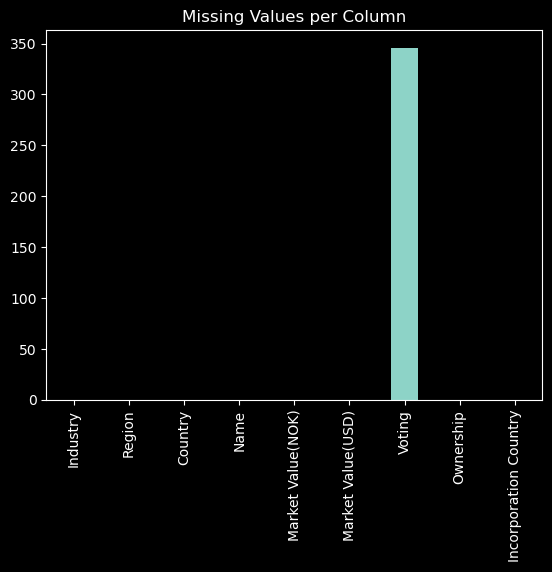

In [188]:
df.isna().sum().plot(kind='bar')
plt.title('Missing Values per Column')
plt.show()

In [189]:
#Understanding how many null values are in the 'Voting' column and how significative they are
null_voting = df['Voting'].isnull().sum()
total_values = len(df)
percentage_null_voting = (null_voting / total_values) * 100
print(f"Percentage of null values in 'Voting' column: {percentage_null_voting:.2f}%")


Percentage of null values in 'Voting' column: 4.00%


**Handling the missing values in the Voting column**

We decided to replace the missing values in the Voting column with the overall mean of the variable. This approach allows us to retain all financial records while maintaining a consistent reference for voting power across the dataset.

Although sector- or region-specific averages could have been computed, doing so would introduce structural bias, as voting rights are determined case by case, depending both on the Fund's investment decisions and on the rights each company’s holdings grant to shareholders, rather than on general industry or regional patterns. Using the global mean thus provides a neutral imputation method that preserves the dataset’s integrity and avoids distorting the overall relationship between Voting and Ownership.

In [190]:
# The original dataframe is preserved for reference.
df_cleaned = df.copy()

In [191]:
mean_value = df_cleaned['Voting'].mean()
df_cleaned['Voting'] = df_cleaned['Voting'].fillna(value=mean_value)

In [192]:
# Verifying that no missing values remain after imputation.
df_cleaned.isna().any()

Industry                 False
Region                   False
Country                  False
Name                     False
Market Value(NOK)        False
Market Value(USD)        False
Voting                   False
Ownership                False
Incorporation Country    False
dtype: bool

**Dropping 'Incorporation Country**

The `Incorporation Country` column is removed as it is not relevant to our analysis.  
It mainly reflects legal registration details, whereas our focus is on operational and financial data.  
Eliminating this column helps streamline the dataset without losing analytical value.


In [193]:
df_cleaned = df_cleaned.drop(columns= ['Incorporation Country'])

In [194]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market Value(NOK),Market Value(USD),Voting,Ownership
0,Basic Materials,Asia,India,Aarti Industries Ltd,93873366,8265429,0.48,0.48
1,Basic Materials,Europe,Lithuania,AB Grigeo,28461548,2506003,1.75,1.75


In [195]:
#The Market value in NOK, the norwegian currency, will be dropped since it is not relevant for the analysis
df_cleaned = df_cleaned.drop(columns= ['Market Value(NOK)'])

In [196]:
#A cleaner format for a column name
df_cleaned.rename(columns={
    "Market Value(USD)": "Market_Value_USD",
}, inplace=True)


In [197]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          8659 non-null   object 
 1   Region            8659 non-null   object 
 2   Country           8659 non-null   object 
 3   Name              8659 non-null   object 
 4   Market_Value_USD  8659 non-null   int64  
 5   Voting            8659 non-null   float64
 6   Ownership         8659 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 473.7+ KB


The Market Value column shows the value of the fund’s investment in each company, i.e., the total value of the equity stake the fund holds.

In [198]:
#The printed value matches the value shown by the fund's official website
total_value = df_cleaned['Market_Value_USD'].sum()    
print(f'The total market value of the fund in EQUITIES only is: ${total_value:,.2f}')

The total market value of the fund in EQUITIES only is: $1,285,843,040,083.00


The computed value aligns exactly with the figure reported on the fund’s official website for equity holdings in 2024.  
This validates the correctness of our calculations and confirms the consistency of our analysis methodology.  
Reference: [NBIM – All Investments 2024](https://www.nbim.no/en/investments/all-investments/#/2024)


**Creating the Portfolio_Weight Column**

The `Market Value` column reflects the absolute investment value of the fund in each company.  

To better understand the relative importance of each holding, we decided to create a new column: `Portfolio_Weight`, which represents the proportion of the fund's total investments accounted for by each company. 

This allows us to analyze the fund's allocation both in absolute and relative terms.


In [199]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75


In [200]:
df_cleaned['Portfolio_Weight'] = df_cleaned['Market_Value_USD'] / total_value *100

In [201]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195


In [202]:
#Checking the dataframe after adding the Portfolio_Weight column
df_cleaned.sort_values(by='Portfolio_Weight', ascending=False)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
7186,Technology,North America,United States,Apple Inc,46210392003,1.220000,1.22,3.593782
7724,Technology,North America,United States,Microsoft Corp,43758827987,1.400000,1.40,3.403124
7794,Technology,North America,United States,NVIDIA Corp,42973911250,1.310000,1.31,3.342081
7160,Technology,North America,United States,Alphabet Inc,29271691564,0.880000,1.26,2.276459
679,Consumer Discretionary,North America,United States,Amazon.com Inc,26979313029,1.170000,1.17,2.098181
...,...,...,...,...,...,...,...,...
3025,Financials,Asia,Indonesia,Bank Neo Commerce Tbk PT,0,1.059142,0.00,0.000000
1114,Consumer Discretionary,Africa,Egypt,GB Corp/EG,0,1.059142,0.00,0.000000
8597,Utilities,Europe,Russia,RusHydro PJSC,0,1.059142,0.00,0.000000
2297,Consumer Staples,Asia,Thailand,GFPT PCL,0,1.059142,0.00,0.000000


In [212]:
# Portfolio weight should sum to 100%
df_cleaned['Portfolio_Weight'].sum()

100.0

In [203]:
df_cleaned[df_cleaned['Market_Value_USD'] == 0]

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
765,Consumer Discretionary,Asia,Thailand,BEC World PCL,0,1.059142,0.00,0.0
1114,Consumer Discretionary,Africa,Egypt,GB Corp/EG,0,1.059142,0.00,0.0
1475,Consumer Discretionary,Africa,Egypt,MM Group for Industry & International Trade SAE,0,1.059142,0.00,0.0
2297,Consumer Staples,Asia,Thailand,GFPT PCL,0,1.059142,0.00,0.0
2801,Energy,Europe,United Kingdom,Petrofac Ltd,0,1.059142,0.00,0.0
3025,Financials,Asia,Indonesia,Bank Neo Commerce Tbk PT,0,1.059142,0.00,0.0
4393,Health Care,Europe,Germany,Marseille-Kliniken AG,0,1.059142,0.00,0.0
4542,Health Care,Asia,South Korea,R Bio Co Ltd,0,0.450000,0.45,0.0
6754,Real Estate,Europe,United Kingdom,Home Reit PLC,0,1.059142,0.00,0.0
6849,Real Estate,Asia,Thailand,LPN Development PCL,0,1.059142,0.00,0.0


In [204]:
df_cleaned[df_cleaned['Market_Value_USD'] == 0].shape

(14, 8)

There are 14 companies in the dataset with `Market_Value_USD` equal to 0.  
This can occur because the fund may have voted on these companies or held them previously, but at the snapshot date of the portfolio, there was no actual market value reported.  
For the purpose of this analysis, these entries will be removed.  
Excluding them helps clean the dataset and ensures that our analysis focuses only on holdings that contribute economically to the portfolio.
<!--  -->

In [ ]:
print(df_cleaned.shape)
df_cleaned = df_cleaned[df_cleaned['Market_Value_USD'] > 0]
df_cleaned.shape #Checking the shape after removing rows with 0 market value. Must be 14 rows less.

(8659, 8)


(8645, 8)

In [206]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195


In [207]:
#Last cleaning step: re-checking if there are any null values
df_cleaned.isnull().sum()

Industry            0
Region              0
Country             0
Name                0
Market_Value_USD    0
Voting              0
Ownership           0
Portfolio_Weight    0
dtype: int64

In [ ]:
# Giving another name to the dataframe for clarity and scalability.
# We use the date of the data (2024) as a reference to make it explicit which snapshot we are analyzing.
# Creating a separate copy ensures that further data cleaning, filtering, or transformations
# can be applied without affecting the previous dataframe, improving reproducibility and traceability.
fund_2024 = df_cleaned.copy()


In [210]:
fund_2024.head()

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195
2,Basic Materials,Europe,Spain,Acerinox SA,44222411,1.81,1.81,0.003439
3,Basic Materials,Asia,Japan,Achilles Corp,346429,0.26,0.26,0.000027
4,Basic Materials,North America,Canada,Aclara Resources Inc,93266,0.18,0.18,0.000007


In [211]:
fund_2024.tail()

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
8654,Utilities,Asia,China,Xinyi Energy Holdings Ltd,344,1.059142,0.00,2.675288e-08
8655,Utilities,Asia,Malaysia,YTL Corp Bhd,64203424,0.970000,0.97,4.993100e-03
8656,Utilities,Asia,Malaysia,YTL Power International Bhd,58886955,0.730000,0.73,4.579638e-03
8657,Utilities,Europe,United Kingdom,Yu Group plc,3520023,0.930000,0.93,2.737522e-04
8658,Utilities,Asia,China,Zhongyu Energy Holdings Ltd,85142,0.010000,0.01,6.621492e-06


# First Objective

1) Identify the sector that holds the largest share of the fund's total investments at the end of 2024  
2) Examine the sector distribution in relative terms to understand the portfolio's composition.


In [213]:
fund_2024.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195


In [214]:
fund_2024.groupby('Industry')['Market_Value_USD'].sum().sort_values(ascending=False)

Industry
Technology                347235729038
Financials                197686814418
Consumer Discretionary    183400008738
Industrials               162667017609
Health Care               126313700993
Real Estate                62811616191
Consumer Staples           59309363538
Energy                     40401420663
Basic Materials            39521759400
Telecommunications         36805564927
Utilities                  29690044568
Name: Market_Value_USD, dtype: int64

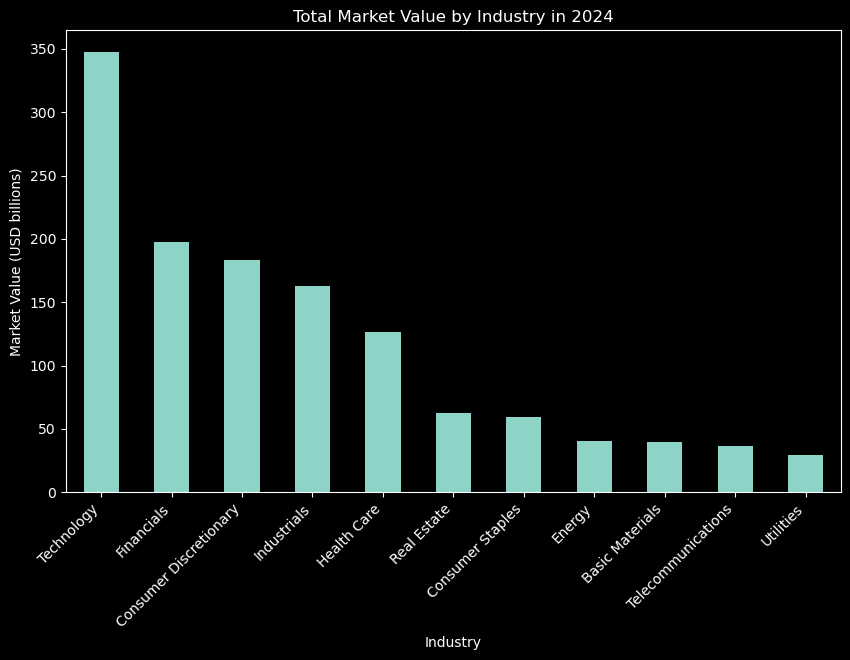

In [220]:
# Convert Market Value to billions USD
market_by_industry = fund_2024.groupby('Industry')['Market_Value_USD'].sum() / 1e9

# Plot
market_by_industry.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Total Market Value by Industry in 2024')
plt.ylabel('Market Value (USD billions)')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.show()


Having identified Technology as the industry with the highest total investment in the fund, I now examine the distribution in relative terms to assess the proportional weight of each sector within the portfolio.


In [219]:
industry_market_value = fund_2024.groupby('Industry')['Market_Value_USD'].sum()
industry_market_value_percentage = (industry_market_value / industry_market_value.sum()) * 100
industry_market_value_percentage.sort_values(ascending=False)

Industry
Technology                27.004519
Financials                15.374102
Consumer Discretionary    14.263017
Industrials               12.650612
Health Care                9.823415
Real Estate                4.884859
Consumer Staples           4.612489
Energy                     3.142018
Basic Materials            3.073607
Telecommunications         2.862368
Utilities                  2.308994
Name: Market_Value_USD, dtype: float64

Investments in the technology sector represent 27.09% of the fund's total portfolio.  
This reflects the overall prominence of the technology industry, while finance and consumer discretionary also maintain a substantial share of the holdings.


# Second Objective

In this section, we explore the fund's allocation across different dimensions, both in terms of the number of holdings and their relative weight within the portfolio.

1) Fund Allocation by Country: Holdings vs Portfolio Weight

Here we analyze the distribution of the fund's holdings by country, comparing the number of companies in which the fund invests versus the proportion of total portfolio value each country represents.  
This comparison provides insight into which markets are more heavily weighted in terms of capital versus sheer number of holdings.


2) Fund Allocation by Industry: Holdings vs Portfolio Weight

This subsection examines how the fund’s holdings are distributed across sectors, again comparing the number of holdings versus their portfolio weight.  
Analyzing sector-level allocation not only highlights areas of strategic focus, risk concentration, or potential growth opportunities, but also provides insight into how the fund is actively positioning itself across different industries over time.


3) Fund Allocation by Region: Holdings vs Portfolio Weight

This subsection examines how the fund’s holdings are distributed across regions, comparing the number of holdings versus their portfolio weight.  
Analyzing region-level allocation helps highlight geographic areas of strategic focus, potential risk concentration, and long-term growth opportunities.  
It also provides insight into how the fund is positioning its capital across global markets and how its exposure differs between the number of holdings and the financial significance of each region.


## 1) Fund Allocation by Country: Holdings vs Portfolio Weight

In [221]:
# Top 10 countries by number of holdings
fund_2024['Country'].value_counts().head(10)

Country
United States     1758
Japan             1436
China              651
India              550
Taiwan             508
South Korea        484
United Kingdom     323
Australia          318
Malaysia           217
Germany            176
Name: count, dtype: int64

In [222]:
fund_2024['Country'].value_counts(normalize=True).head(10)*100

Country
United States     20.335454
Japan             16.610758
China              7.530364
India              6.362059
Taiwan             5.876229
South Korea        5.598612
United Kingdom     3.736264
Australia          3.678427
Malaysia           2.510121
Germany            2.035859
Name: proportion, dtype: float64

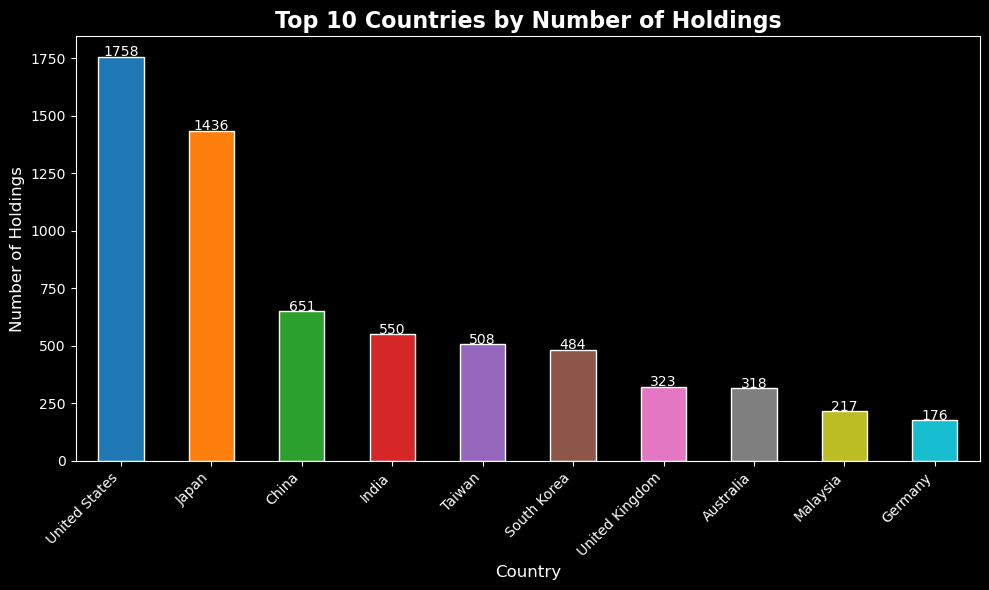

In [223]:
# Top 10 countries by number of holdings
count = fund_2024['Country'].value_counts().head(10)

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Top 10 Countries by Number of Holdings', fontsize=16, weight='bold', color='white')
plt.xlabel('Country', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

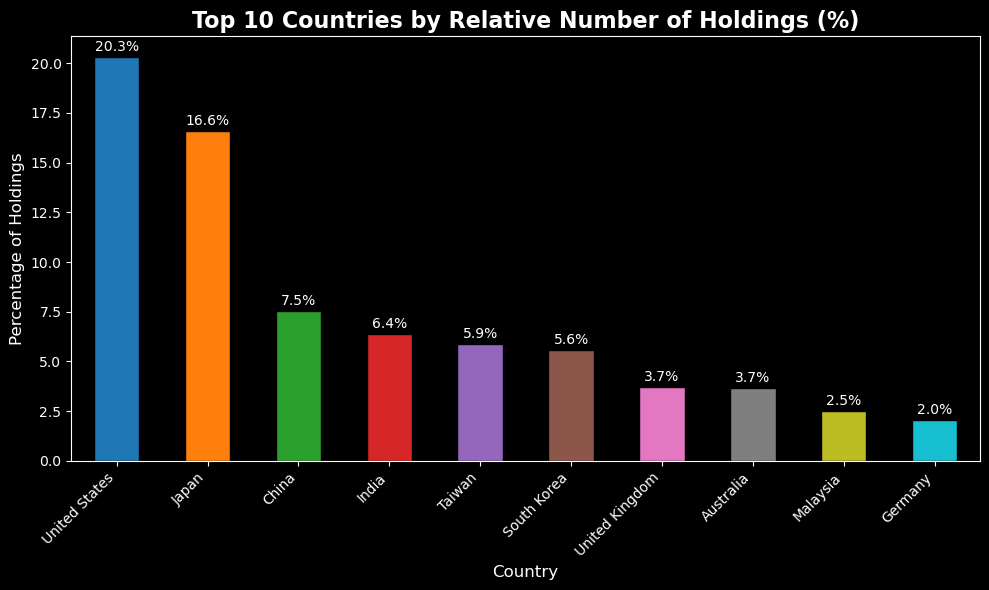

In [224]:
# Top 10 countries by relative number of holdings (%)
count_relative = (fund_2024['Country'].value_counts(normalize=True).head(10)) * 100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Top 10 Countries by Relative Number of Holdings (%)', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [225]:
fund_2024['Portfolio_Weight'].groupby(fund_2024['Country']).sum().sort_values(ascending=False).head(10)

Country
United States     55.919018
Japan              6.540745
United Kingdom     5.232338
China              3.165042
Switzerland        3.134932
Germany            3.081049
France             2.989951
India              2.396291
Taiwan             2.388093
Canada             1.949734
Name: Portfolio_Weight, dtype: float64

Text(0.5, 1.0, 'Top 10 Countries by Portfolio Weight (%)')

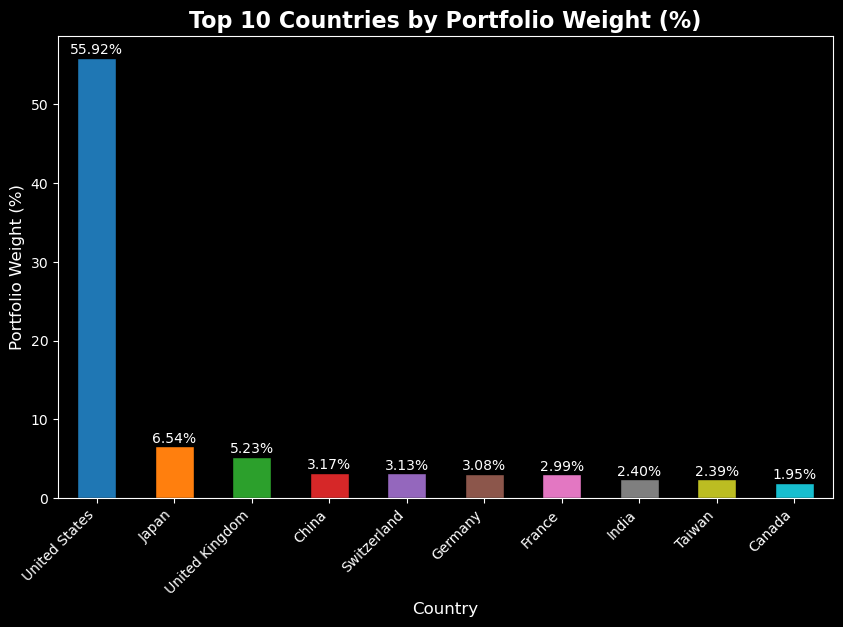

In [226]:
by_weight= fund_2024['Portfolio_Weight'].groupby(fund_2024['Country']).sum().sort_values(ascending=False).head(10)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Country', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Portfolio Weight (%)', fontsize=16, weight='bold')


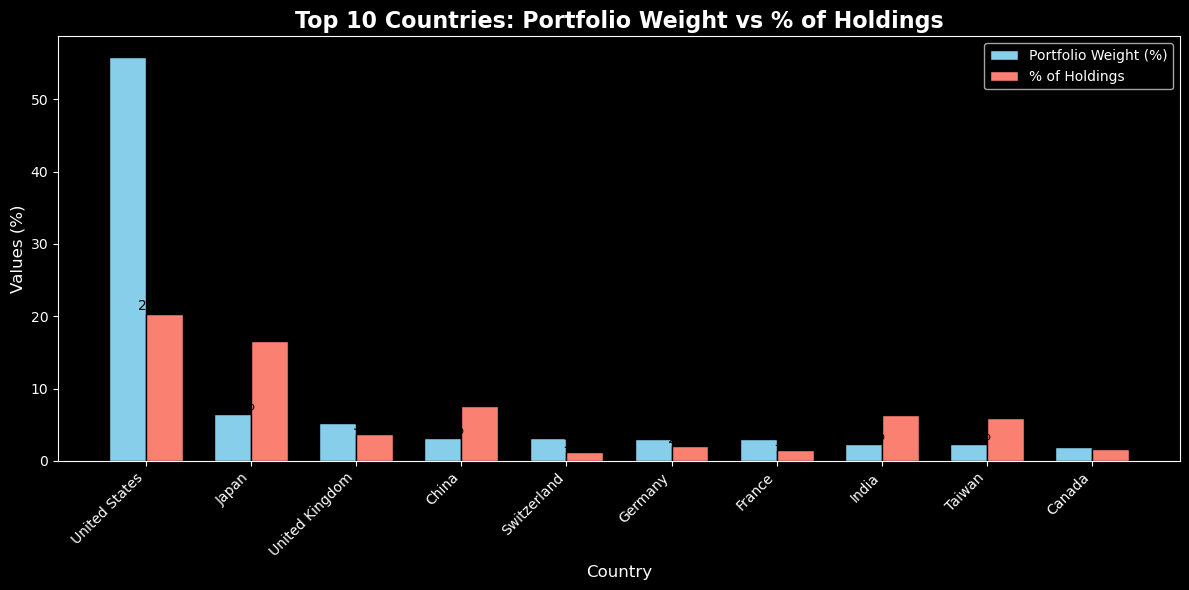

In [227]:
# Data
by_weight = fund_2024['Portfolio_Weight'].groupby(fund_2024['Country']).sum().sort_values(ascending=False).head(10)
by_count = (fund_2024['Country'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Top 10 Countries: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()


for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='black')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Fund Allocation by Country: Holdings vs Portfolio Weight – Key Insights**

The comparison between the top 10 countries by portfolio weight and by number of holdings reveals important differences in how the fund distributes its capital. 

The United States represents nearly 56% of the total portfolio weight while accounting for only around 20% of holdings, indicating a significant concentration of capital in a single developed market. This suggests that the fund prioritizes stability, liquidity, and strong performance, accepting higher country-specific risk in exchange for potentially more predictable returns.

Japan, although not as dominant, follows at some distance with 16,6% of total tenure, but contributing only around 6.5% to the overall portfolio weight.

In contrast, several East Asian markets, including China, India, and Taiwan, show a higher proportion of holdings relative to their portfolio weight. This may reflect the fund’s perspective on the long-term growth potential of East Asia, favoring broad exposure in the region despite smaller current investment sizes. Meanwhile, European and North American (Canada) countries, such as the United Kingdom, Germany, Switzerland, France, and Canada, display fewer holdings but a much larger share of portfolio weight per holding, suggesting stronger current performance and consolidated value creation.

Overall, the comparison highlights the distinction between number of holdings and capital exposure, illustrating the fund’s dual strategy of maintaining concentration in developed markets while positioning itself for the gradual expansion of East Asian economies.

## 2) Fund Allocation by Industry: Holdings vs Portfolio Weight
After reviewing country-level allocation, we now turn to the distribution of the fund’s investments across different industries.

In [228]:
fund_2024['Industry'].value_counts()

Industry
Industrials               1735
Consumer Discretionary    1469
Financials                1061
Technology                1055
Health Care                810
Real Estate                631
Basic Materials            628
Consumer Staples           571
Utilities                  265
Energy                     210
Telecommunications         210
Name: count, dtype: int64

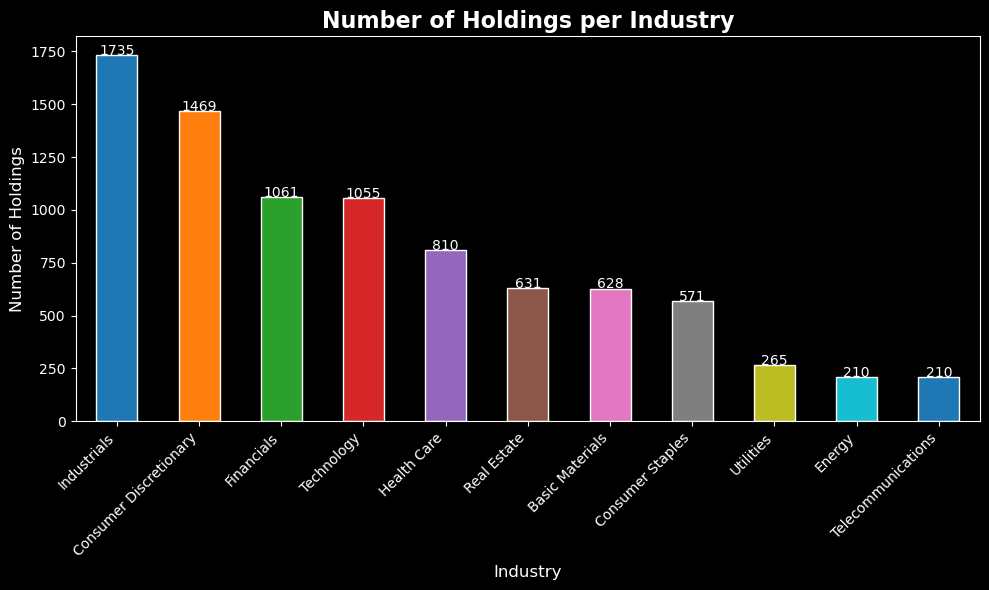

In [229]:
# Industry holdings count
count = fund_2024['Industry'].value_counts()

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Number of Holdings per Industry', fontsize=16, weight='bold', color='white')
plt.xlabel('Industry', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

In [230]:
# Industry by portfolio weight
fund_2024['Industry'].value_counts(normalize=True)*100

Industry
Industrials               20.069404
Consumer Discretionary    16.992481
Financials                12.272990
Technology                12.203586
Health Care                9.369578
Real Estate                7.299017
Basic Materials            7.264315
Consumer Staples           6.604974
Utilities                  3.065356
Energy                     2.429150
Telecommunications         2.429150
Name: proportion, dtype: float64

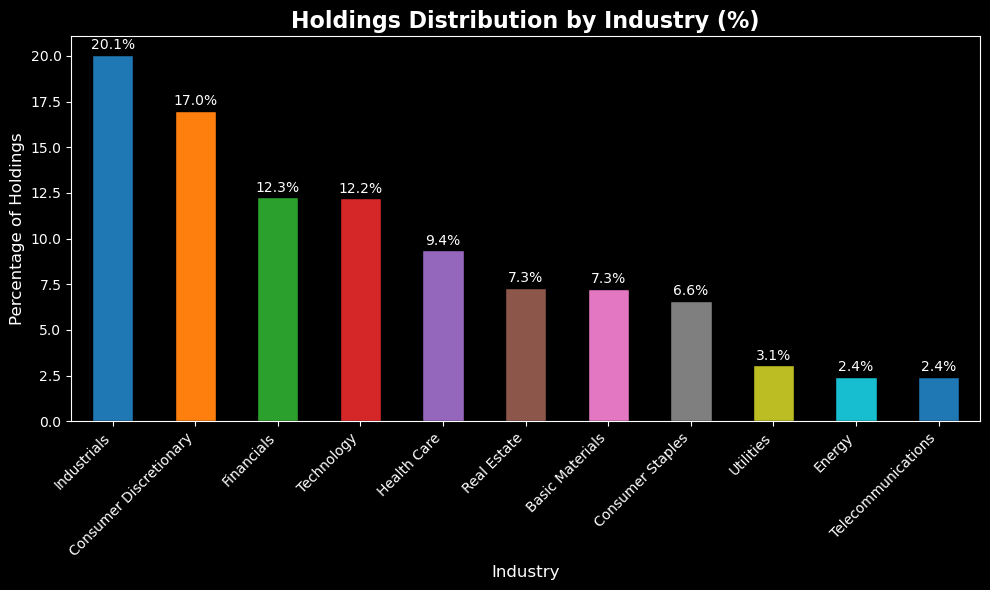

In [231]:
# Industry by relative number of holdings (%)
count_relative = fund_2024['Industry'].value_counts(normalize=True)*100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Holdings Distribution by Industry (%)', fontsize=16, weight='bold')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [232]:
fund_2024.groupby('Industry')['Portfolio_Weight'].sum().sort_values(ascending=False)

Industry
Technology                27.004519
Financials                15.374102
Consumer Discretionary    14.263017
Industrials               12.650612
Health Care                9.823415
Real Estate                4.884859
Consumer Staples           4.612489
Energy                     3.142018
Basic Materials            3.073607
Telecommunications         2.862368
Utilities                  2.308994
Name: Portfolio_Weight, dtype: float64

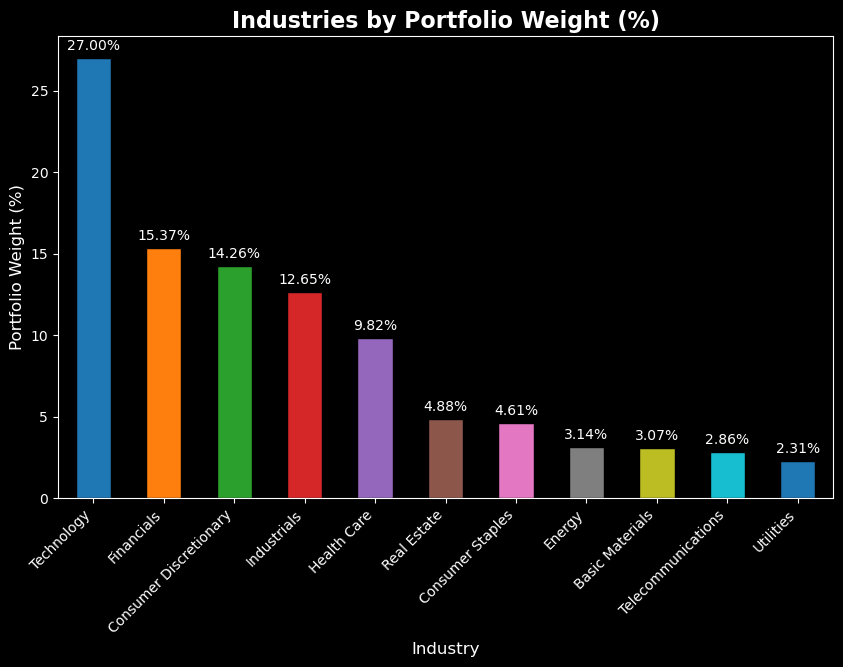

In [234]:
by_weight= fund_2024['Portfolio_Weight'].groupby(fund_2024['Industry']).sum().sort_values(ascending=False)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Industry', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Industries by Portfolio Weight (%)', fontsize=16, weight='bold')
plt.show()

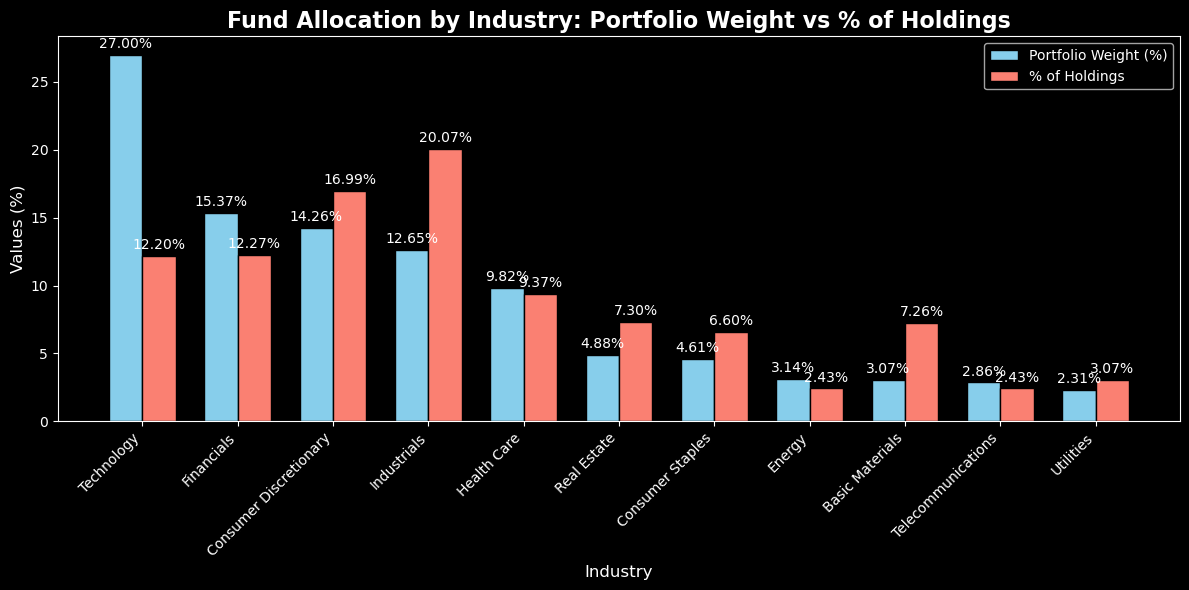

In [235]:
# Data
by_weight = fund_2024['Portfolio_Weight'].groupby(fund_2024['Industry']).sum().sort_values(ascending=False)
by_count = (fund_2024['Industry'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Industry', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Fund Allocation by Industry: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()

# Show values on top of bars in white
for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='white')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

plt.show()

**Fund Allocation by Industry: Holdings vs Portfolio Weight – Key Insights**

Analyzing the fund’s holdings by industry highlights differences between the number of holdings and portfolio weight. Industrials and Consumer Discretionary represent the largest number of holdings, reflecting the fund’s broad exposure across companies in these sectors. However, when considering portfolio weight, Technology stands out as the most significant sector, accounting for over 27% of total portfolio weight, despite being the fourth industry in terms of total number of holdings.

This discrepancy indicates that while the fund maintains diversified exposure across many companies in traditional sectors, it concentrates capital in high-value, strategically important industries such as Technology and Financials, likely due to their stronger performance and potential for long-term value creation. Sectors like Real Estate, Consumer Staples and Basic Materials have numerous holdings but contribute relatively less to portfolio weight, suggesting smaller average investment sizes per company.

Overall, the fund appears to balance diversification and concentration: it spreads its holdings across multiple sectors to mitigate risk and avoid overloading any single industry, while still allocating the largest share of capital to high-impact sectors like Technology to maximize potential returns.

## 3) Fund Allocation by Region: Holdings vs Portfolio Weight

In [236]:
fund_2024['Region'].value_counts()

Region
Asia             4386
North America    1901
Europe           1540
Oceania           352
Latin America     210
Middle East       136
Africa            120
Name: count, dtype: int64

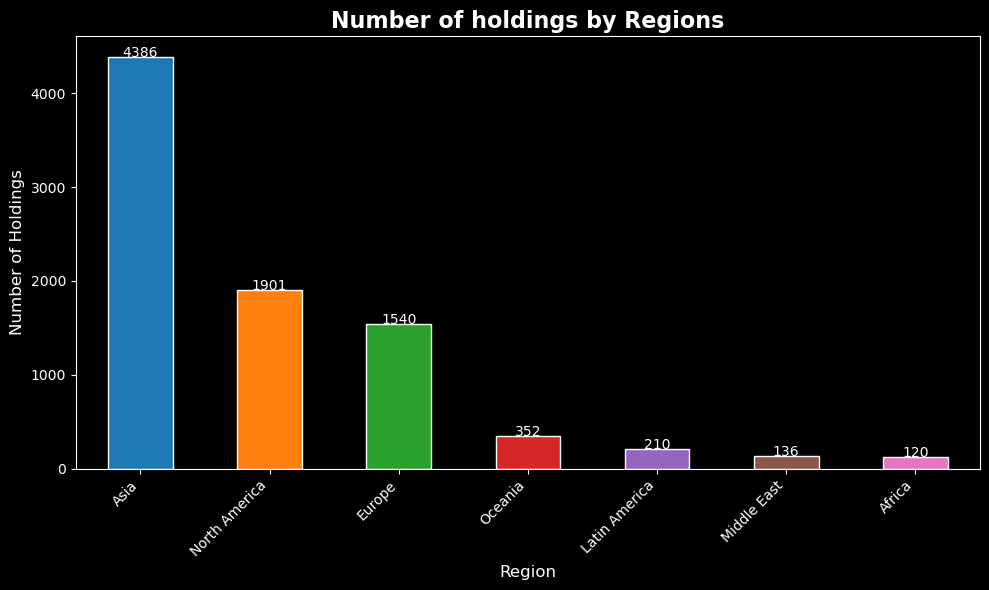

In [237]:
# Number of holdings by Region
count = fund_2024['Region'].value_counts()

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Number of holdings by Regions', fontsize=16, weight='bold', color='white')
plt.xlabel('Region', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

In [238]:
fund_2024['Region'].value_counts(normalize=True)*100

Region
Asia             50.734529
North America    21.989589
Europe           17.813765
Oceania           4.071718
Latin America     2.429150
Middle East       1.573164
Africa            1.388086
Name: proportion, dtype: float64

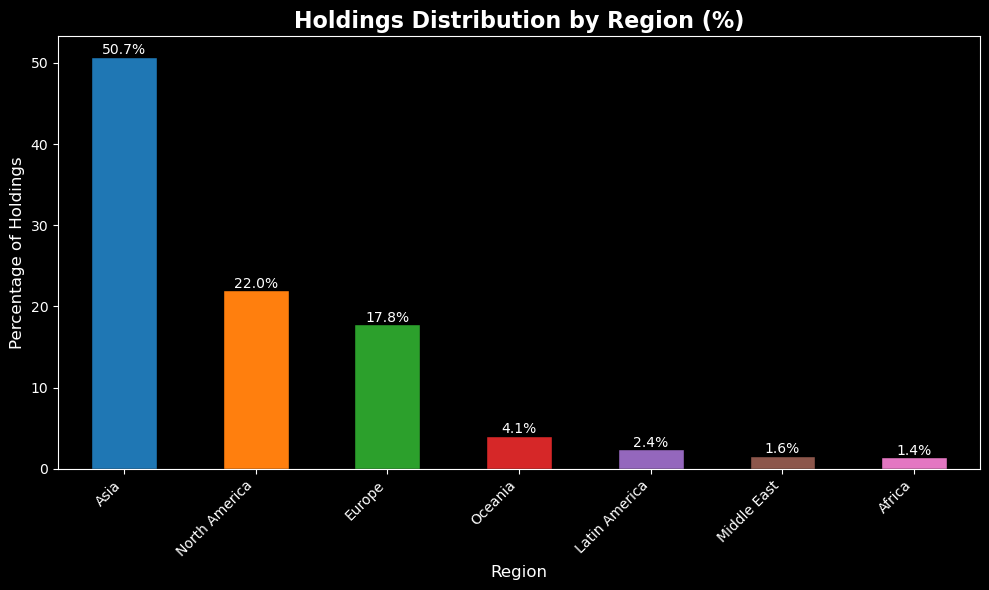

In [239]:
# Region by relative number of holdings (%)
count_relative = fund_2024['Region'].value_counts(normalize=True)*100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Holdings Distribution by Region (%)', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [241]:
fund_2024['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)

Region
North America    57.868752
Europe           21.453064
Asia             17.399995
Oceania           1.708706
Latin America     0.650874
Middle East       0.532423
Africa            0.386186
Name: Portfolio_Weight, dtype: float64

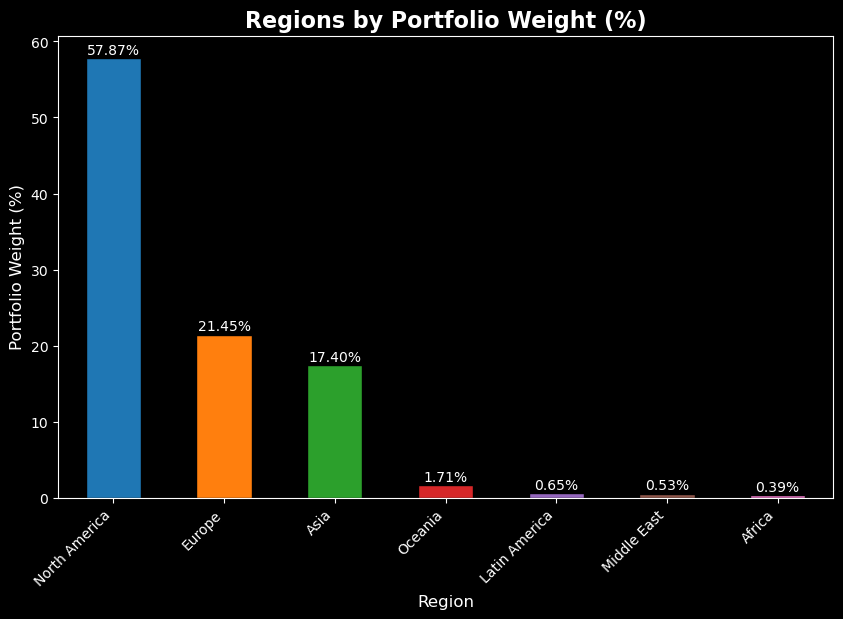

In [242]:
by_weight= fund_2024['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Region', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Regions by Portfolio Weight (%)', fontsize=16, weight='bold')
plt.show()

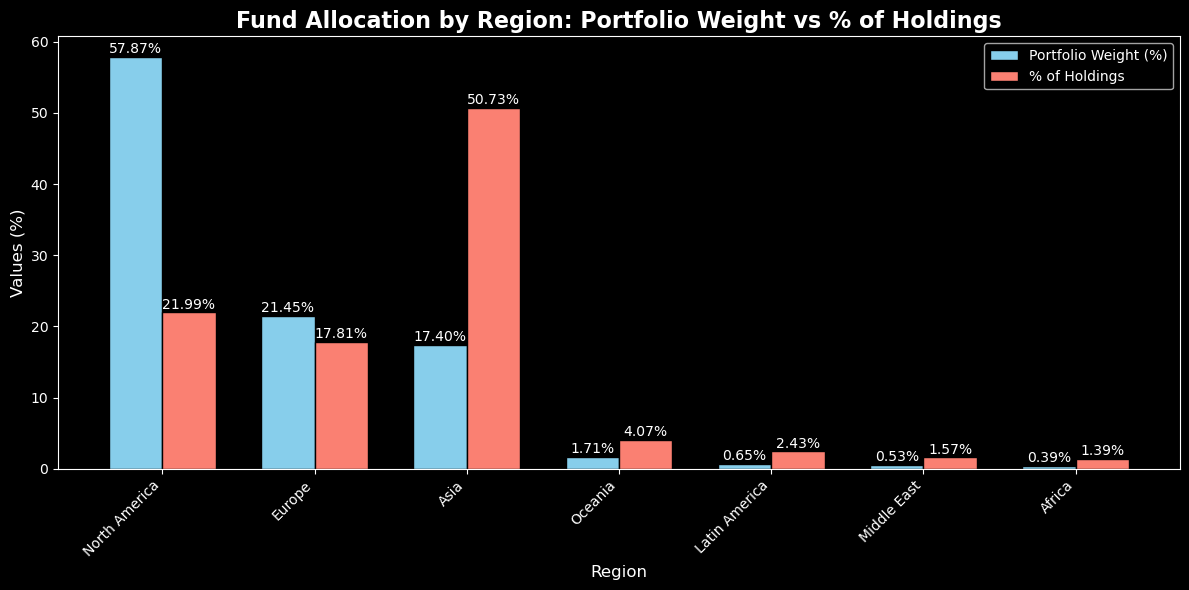

In [243]:
# Data
by_weight = fund_2024['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)
by_count = (fund_2024['Region'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Fund Allocation by Region: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()

# Show values on top of bars in white
for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='white')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

plt.show()

**Fund Allocation by Region: Holdings vs Portfolio Weight – Key Insights**

The comparison between the relative number of holdings and portfolio weight by region highlights significant differences in how the fund allocates its capital. Asia accounts for the majority of the fund’s holdings in terms of number of companies, reflecting a broad diversification across emerging and growth markets. However, North America carries the largest share of portfolio weight, indicating that these holdings are more financially significant despite being fewer in number. Europe also exhibits a substantial share relative to its number of holdings, reflecting targeted investments in high-value companies.

This distinction between number of holdings and capital exposure provides insight into the fund’s strategic allocation: it diversifies widely in regions like Asia while concentrating financial weight in regions with established markets such as North America and Europe. Less represented regions including Oceania, Latin America, the Middle East, and Africa collectively contribute a minor share of both holdings and portfolio weight.

## Outcomes 

1) **Industry**: Technology (27.1%) and Financials (16.7%) are the sectors with the highest portfolio weight, indicating where the fund has the most significant capital allocation.  

2) **Country**: The United States accounts for approximately 54.7% of the total portfolio weight, emphasizing its significance within the fund. This helps us understand how the fund’s capital is distributed at the country level and which markets contribute most to its overall exposure.

3) **Region**: Europe (~22.2%) and Asia (~17.5%) are the regions with the largest contribution outside North America. Canada is excluded from the regional analysis to avoid redundancy, as its portfolio weight is comparatively minor.  




# Thir objective: quick look into Tech, USA, Asia and Europe

In [244]:
#Making a dataframe for each of the top 2 industries: Technology and Financials
tech_df = fund_2024[fund_2024['Industry'] == 'Technology']
fin_df = fund_2024[fund_2024['Industry'] == 'Financials']

In [245]:
tech_df['Region'].value_counts()

Region
Asia             630
North America    264
Europe           111
Oceania           32
Middle East       10
Africa             4
Latin America      4
Name: count, dtype: int64

In [101]:
tech_df.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
6905,Technology,Asia,China,3peak Inc,3873156,0.15,0.15,0.000279
6906,Technology,North America,United States,A10 Networks Inc,508363,0.04,0.04,0.000037


In [99]:
tech_df['Region'].value_counts(normalize=True)*100

Region
Asia             60.079444
North America    24.528302
Europe           10.427011
Oceania           3.277061
Middle East       1.191658
Africa            0.397219
Latin America     0.099305
Name: proportion, dtype: float64

tech_df['Region'].groupby(tech)

In [ ]:
tech_df['Name']

In [ ]:
fin_df['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)

Region
North America    7.273139
Europe           5.099545
Asia             3.306041
Oceania          0.507813
Middle East      0.222008
Africa           0.157809
Latin America    0.153421
Name: Portfolio_Weight, dtype: float64

In [ ]:
fund_2024[fund_2024['Country'] == 'Brazil'].sort_values(by='Portfolio_Weight', ascending=False)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
2724,Energy,Latin America,Brazil,Petroleo Brasileiro SA - Petrobras,877026452,0.690000,1.15,6.318978e-02
3337,Financials,Latin America,Brazil,Itau Unibanco Holding SA,639335402,0.020000,0.88,4.606413e-02
1353,Consumer Discretionary,Latin America,Brazil,Localiza Rent a Car SA,333310272,4.150000,4.11,2.401501e-02
8210,Utilities,Latin America,Brazil,Equatorial Energia SA,311146989,3.760000,3.76,2.241815e-02
3338,Financials,Latin America,Brazil,Itausa SA,199613893,1.040469,0.91,1.438219e-02
...,...,...,...,...,...,...,...,...
3333,Financials,Latin America,Brazil,IRB-Brasil Resseguros SA,196855,0.030000,0.03,1.418341e-05
4113,Health Care,Latin America,Brazil,Fleury SA,100186,0.010000,0.01,7.218404e-06
6496,Real Estate,Latin America,Brazil,FICA Empreendimentos Imobiliarios SA,92234,1.740000,1.74,6.645462e-06
3844,Financials,Latin America,Brazil,Wiz Co,22916,0.010000,0.01,1.651098e-06


In [ ]:
tech_df['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)

Region
North America    20.720723
Asia              4.100947
Europe            2.113946
Oceania           0.085369
Africa            0.062463
Middle East       0.013999
Latin America     0.000099
Name: Portfolio_Weight, dtype: float64

In [ ]:
tech_df['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)

In [ ]:
top20_sum = fund_2024.sort_values('Portfolio_Weight', ascending=False).head(20)['Portfolio_Weight'].sum()
print(f"Sum of Portfolio Weight of the top 15 holdings: {top20_sum:.2f}%")

Sum of Portfolio Weight of the top 15 holdings: 25.26%


In [116]:
tech_df[tech_df['Region'] == 'Asia'].sort_values(by='Portfolio_Weight', ascending=False).head(20)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
7759,Technology,Asia,Taiwan,Taiwan Semiconductor Manufacturing Co Ltd,17406706904,1.85,1.85,1.254154
7780,Technology,Asia,China,Tencent Holdings Ltd,8347307312,1.42,1.42,0.601424
7714,Technology,Asia,South Korea,SK Hynix Inc,2628942427,1.67,1.67,0.189415
7795,Technology,Asia,Japan,Tokyo Electron Ltd,1413241168,1.56,1.56,0.101824
7466,Technology,Asia,China,Meituan,1282552797,0.71,1.32,0.092408
7670,Technology,Asia,Singapore,Sea Ltd,1103831508,1.04,1.21,0.079531
7293,Technology,Asia,Taiwan,Hon Hai Precision Industry Co Ltd,929310108,1.21,1.21,0.066957
7460,Technology,Asia,Taiwan,MediaTek Inc,871701733,1.27,1.27,0.062806
6924,Technology,Asia,Japan,Advantest Corp,829557579,1.47,1.47,0.059770
7228,Technology,Asia,Japan,Fujitsu Ltd,765553812,1.52,1.52,0.055158


In [ ]:
top15_sum

22.91832174940314

In [ ]:
fund_2024[fund_2024['Name'].str.contains('ACADIA')]

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
3874,Health Care,North America,United States,ACADIA Pharmaceuticals Inc,31678716,0.88,0.88,0.002282


In [ ]:
top2_regions = (
    fund_2024.groupby(['Industry', 'Region'])['Portfolio_Weight']
    .sum()
    .reset_index()
    .sort_values(['Industry', 'Portfolio_Weight'], ascending=[True, False])
)

top2_regions = top2_regions.groupby('Industry').head(2)


In [96]:
top2_regions

,Industry,Region,Portfolio_Weight
5,Basic Materials,North America,1.093000
2,Basic Materials,Europe,0.989134
12,Consumer Discretionary,North America,7.903172
8,Consumer Discretionary,Asia,3.235119
19,Consumer Staples,North America,1.931679
16,Consumer Staples,Europe,1.623251
25,Energy,North America,1.426648
22,Energy,Europe,1.037435
32,Financials,North America,7.273139
29,Financials,Europe,5.099545


# Third objective
Merge the ESG Dataset with the fund's dataset
Explore the ESG data
-Dar contexto (2024, esto y aquello, qué significan los 1's y los 0's)
-Decir que lo construí yo con datos del fondo

In [ ]:
# Importing the ESG dataset
esg_2024 = pd.read_excel('esg_2024.xlsx')
esg_2024.head(3)

,Company,Environmental,Social,Governance,Climate change
0,3M Co,1,1,1,0
1,A O Smith Corp,1,0,1,1
2,ABB Ltd,1,1,1,1


In [ ]:
#Checking if there are null values
print(esg_2024.shape)
esg_2024.info()

(992, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         992 non-null    object
 1   Environmental   992 non-null    int64 
 2   Social          992 non-null    int64 
 3   Governance      992 non-null    int64 
 4   Climate change  992 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 38.9+ KB


In [ ]:
#Preparing the dataset for merging it with the fund's dataset
esg_2024= esg_2024.rename(columns={
    'Company': 'Name'})

In [144]:
esg_2024.head(2)

,Name,Environmental,Social,Governance,Climate change
0,3M Co,1,1,1,0
1,A O Smith Corp,1,0,1,1


In [ ]:
#Merging the datasets by the inner method to get only the rows that have a match on the name of the company
test= pd.merge(fund_2024, esg_2024, how='inner', on='Name')
test.head(3)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight,Environmental,Social,Governance,Climate change
0,Basic Materials,North America,Canada,Agnico Eagle Mines Ltd,996265012,1.66,1.66,0.071781,0,0,1,0
1,Basic Materials,Europe,France,Air Liquide SA,2483622535,1.55,1.55,0.178945,1,1,1,1
2,Basic Materials,North America,United States,Air Products and Chemicals Inc,1006984662,1.60,1.60,0.072553,1,1,1,1


In [ ]:
print(f"Rows in fund_2024: {fund_2024.shape[0]}")
print(f"Rows in test: {test.shape[0]}")
print(f"Row difference: {fund_2024.shape[0] - test.shape[0]}")
print(f"Percentage of companies with ESG issues of the portfolio: {fund_2024.shape[0] / test.shape[0]}%")




Rows in fund_H1_2025: 8374
Rows in test: 914
Row difference: 7460
Percentage of companies with ESG issues of the portfolio: 9.161925601750546%


print(f"Filas en fund_H1_2025: {len(fund_H1_2025)}")
print(f"Filas en test: {len(test)}")
print(f"Diferencia: {len(fund_H1_2025) - len(test)}")


Para la integración del dataset de ESG, primero hacemos uno con inner join para ver cuántas empresas quedaron y la dimensión debe ser la del ESG_dataset porque sino quiere decir que algunos nombres no se encontraron

# De acá para abajo corregir (será un comentario de análisis extra)

In [ ]:
fund_2024[fund_2024['Name'].str.contains('Alpha')]

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
2608,Energy,North America,United States,Alpha Metallurgical Resources Inc,542716,0.040000,0.04,3.910270e-05
2840,Financials,Europe,Greece,Alpha Bank SA,156542156,1.930000,1.93,1.127887e-02
3775,Financials,Asia,Thailand,TQM Alpha PCL,9193438,3.420000,3.42,6.623874e-04
3902,Health Care,Asia,Malaysia,Alpha IVF Group Bhd,4323341,1.390000,1.39,3.114968e-04
3903,Health Care,Asia,China,Alphamab Oncology,782,1.040469,0.00,5.634312e-08
4694,Industrials,Middle East,United Arab Emirates,Alpha Dhabi Holding PJSC,1004669,1.040469,0.00,7.238642e-05
6801,Real Estate,Asia,South Korea,Shinhan Alpha REIT Co Ltd,99281,0.020000,0.02,7.153198e-06
6937,Technology,Middle East,United Arab Emirates,Alpha Data PJSC,3075990,0.670000,0.67,2.216251e-04
6938,Technology,North America,United States,Alphabet Inc,26165252659,0.860000,1.22,1.885207e+00
6939,Technology,Europe,United Kingdom,Alphawave IP Group PLC,16747237,0.910000,0.91,1.206639e-03


# REVISAR LOS COMENTARIOS Y PULIR EL LENGUAGE Fourth Objective

1) **Top 30 companies by Voting percentage**  
   Identify the 30 companies where the fund holds the highest total Voting percentage.  
   This gives a sense of where the fund might exert the most influence and helps understand its strategic positions within the portfolio.  

2) **Holdings with Ownership–Voting discrepancies**  
   Analyze all holdings where Ownership and Voting percentages differ.  
   This allows us to explore potential governance patterns and observe cases where the fund's influence may not align directly with its equity stake.



In [ ]:
voting_top30 = fund_2024.sort_values(by="Voting", ascending=False).head(30)
voting_top30

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
6796,Real Estate,Europe,United Kingdom,Shaftesbury Capital PLC,983244569,25.19,25.19,0.070843
6884,Real Estate,Europe,Germany,Vonovia SE,4234717191,14.43,14.43,0.305111
521,Basic Materials,Europe,Sweden,Svenska Cellulosa AB SCA,645914590,9.67,7.13,0.046538
6321,Real Estate,North America,United States,Alexandria Real Estate Equities Inc,1192707490,9.49,9.49,0.085935
6531,Real Estate,Europe,United Kingdom,Great Portland Estates PLC,188421107,9.44,9.44,0.013576
6512,Real Estate,Europe,France,Gecina SA,783902696,9.33,9.33,0.056480
127,Basic Materials,Europe,United Kingdom,Croda International PLC,518646885,9.27,9.27,0.037369
6474,Real Estate,North America,United States,Equity Residential,2346352683,9.15,9.15,0.169055
6761,Real Estate,North America,United States,Regency Centers Corp,1216700785,9.13,9.13,0.087663
6527,Real Estate,Europe,United Kingdom,Grainger PLC,202720322,9.07,9.07,0.014606


In [51]:
voting_top30['Industry'].value_counts()

Industry
Real Estate               18
Basic Materials            4
Financials                 3
Technology                 3
Industrials                1
Consumer Discretionary     1
Name: count, dtype: int64

In [104]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(voting_per_industry)]
plt.pie(
    voting_per_industry, 
    labels=voting_per_industry.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Top 30 Companies: Voting Power Distribution by Industry')
plt.tight_layout()
plt.show()

NameError: name 'voting_per_industry' is not defined

<Figure size 800x800 with 0 Axes>

As a preliminary insight, the fund tends to hold larger positions in businesses that are considered relatively safe and stable over the long term, which explains its investments in Real Estate.  

Holdings in Basic Materials and Technology reflect companies with a strong innovation-for-sustainability component, while high Voting percentages in Financials point to firms with consistently strong profitability.  

Overall, high Voting power indicates that the fund can exert influence in these companies, aligning with its long-term strategic vision.  
Sustainability considerations appear particularly relevant in explaining the fund's significant ownership in Basic Materials and Technology.


2) This section investigates holdings where Ownership and Voting percentages differ, and examine these cases in more detail.  
Analyzing these discrepancies can provide a useful overview of how corporate ownership and voting structures operate in the market, and help us understand the fund's portfolio composition.


In [ ]:
owned_vs_vote = fund_2024['Ownership'] != fund_2024['Voting']
owned_vs_vote

0       False
1       False
2       False
3       False
4       False
        ...  
8369     True
8370    False
8371    False
8372    False
8373    False
Length: 8374, dtype: bool

In [ ]:
owned_vs_vote = fund_2024['Ownership'] != fund_2024['Voting']
num_differ = owned_vs_vote.sum()
print(f"Number of holdings where Ownership differs from Voting: {num_differ}")
print(f"Percentage of holdings with discrepancies between Ownership and Voting: {(num_differ / len(fund_2024)) * 100:.2f}%")

Number of holdings where Ownership differs from Voting: 901
Percentage of holdings with discrepancies between Ownership and Voting: 10.76%


In [ ]:
#Create a dataframe with only the rows where Ownership differs from Voting for further analysis
diff_vote_owned = fund_2024[owned_vs_vote]
diff_vote_owned

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
35,Basic Materials,Europe,United Kingdom,Anglo American PLC,892419207,1.040469,2.57,6.429882e-02
45,Basic Materials,Europe,France,Arkema SA,172774835,2.470000,3.09,1.244843e-02
66,Basic Materials,Europe,Sweden,Beijer Alma AB,3765934,0.130000,0.26,2.713356e-04
77,Basic Materials,Latin America,Brazil,Braskem SA,39649526,1.040469,2.99,2.856749e-03
92,Basic Materials,North America,United States,Century Aluminum Co,18921,1.040469,0.00,1.363258e-06
...,...,...,...,...,...,...,...,...
8305,Utilities,Asia,India,ReNew Energy Global PLC,3128834,0.190000,0.12,2.254326e-04
8315,Utilities,Europe,Russia,RusHydro PJSC,0,1.040469,0.00,0.000000e+00
8357,Utilities,Europe,Poland,Unimot SA,5749867,1.780000,1.86,4.142780e-04
8358,Utilities,Europe,Russia,Unipro PJSC,0,1.040469,0.00,0.000000e+00


In [72]:
#Checking if the difference tends to be more voting higher than ownership or viceversa
# Create boolean masks for direction of discrepancy
voting_higher = diff_vote_owned['Voting'] > diff_vote_owned['Ownership']
ownership_higher = diff_vote_owned['Ownership'] > diff_vote_owned['Voting']

In [73]:
# Add a new column to diff_vote_owned to indicate which is higher
diff_vote_owned['Discrepancy_Type'] = ['Voting > Ownership' if v else 'Ownership > Voting' 
                                       for v in voting_higher]

C:\Users\Jose Fernando Barros\AppData\Local\Temp\ipykernel_27696\1816497702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_vote_owned['Discrepancy_Type'] = ['Voting > Ownership' if v else 'Ownership > Voting'


Discrepancy_Type
Ownership > Voting    459
Voting > Ownership    442
Name: count, dtype: int64


<Axes: xlabel='Discrepancy_Type'>

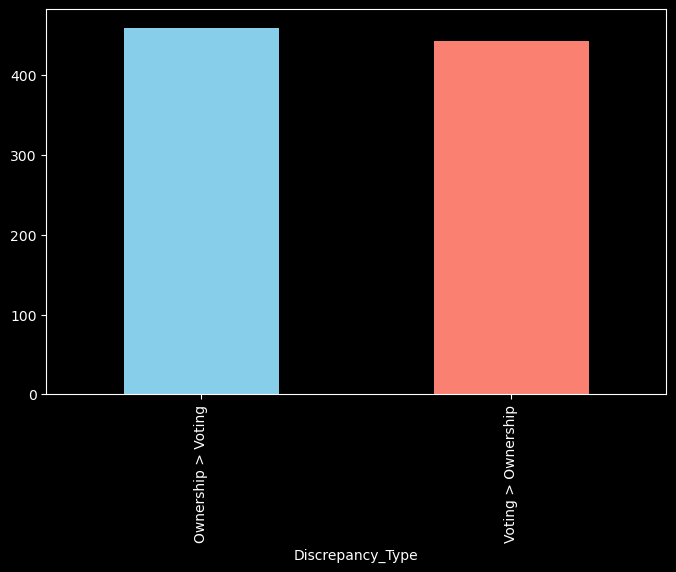

In [74]:
print(diff_vote_owned['Discrepancy_Type'].value_counts())
diff_vote_owned['Discrepancy_Type'].value_counts().plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])


In [75]:
diff_vote_owned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight,Discrepancy_Type
35,Basic Materials,Europe,United Kingdom,Anglo American PLC,892419207,1.040469,2.57,0.064299,Ownership > Voting
45,Basic Materials,Europe,France,Arkema SA,172774835,2.470000,3.09,0.012448,Ownership > Voting


In [76]:
# Taking a look at the industries with most discrepancies
diff_vote_owned['Industry'].value_counts()

Industry
Consumer Discretionary    195
Industrials               157
Technology                123
Financials                102
Health Care                93
Real Estate                61
Basic Materials            48
Consumer Staples           45
Utilities                  32
Telecommunications         28
Energy                     17
Name: count, dtype: int64

In [77]:
count = diff_vote_owned['Industry'].value_counts()
pct = (count / count.sum()) * 100
pct

Industry
Consumer Discretionary    21.642619
Industrials               17.425083
Technology                13.651498
Financials                11.320755
Health Care               10.321865
Real Estate                6.770255
Basic Materials            5.327414
Consumer Staples           4.994451
Utilities                  3.551609
Telecommunications         3.107658
Energy                     1.886792
Name: count, dtype: float64

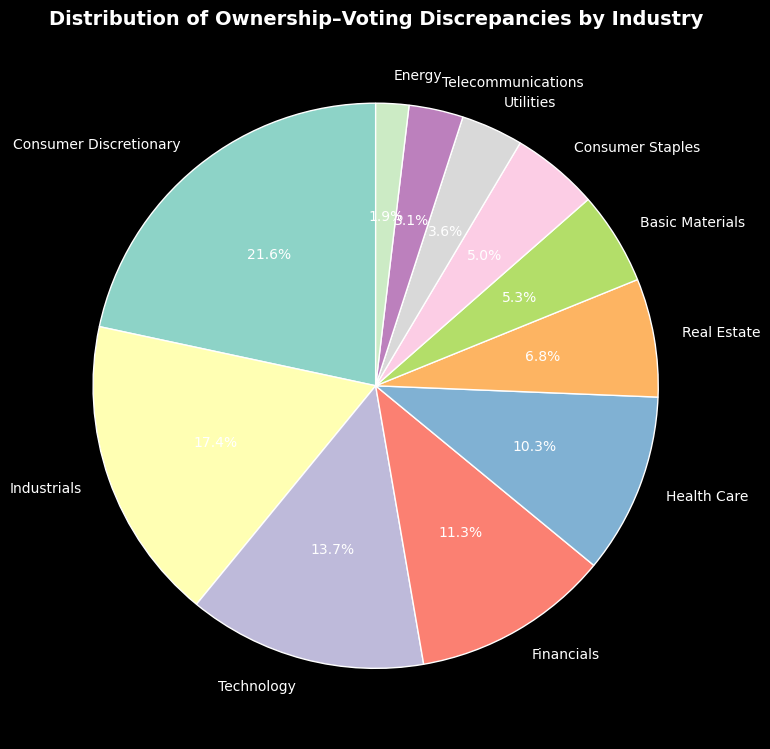

In [78]:
# Visualizing the distribution of discrepancies by industry

plt.figure(figsize=(8, 8))
plt.pie(
    pct,
    labels=pct.index,
    autopct='%1.1f%%',  
    startangle=90,       # starts from the top
    colors=plt.cm.Set3.colors,  
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Distribution of Ownership–Voting Discrepancies by Industry', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

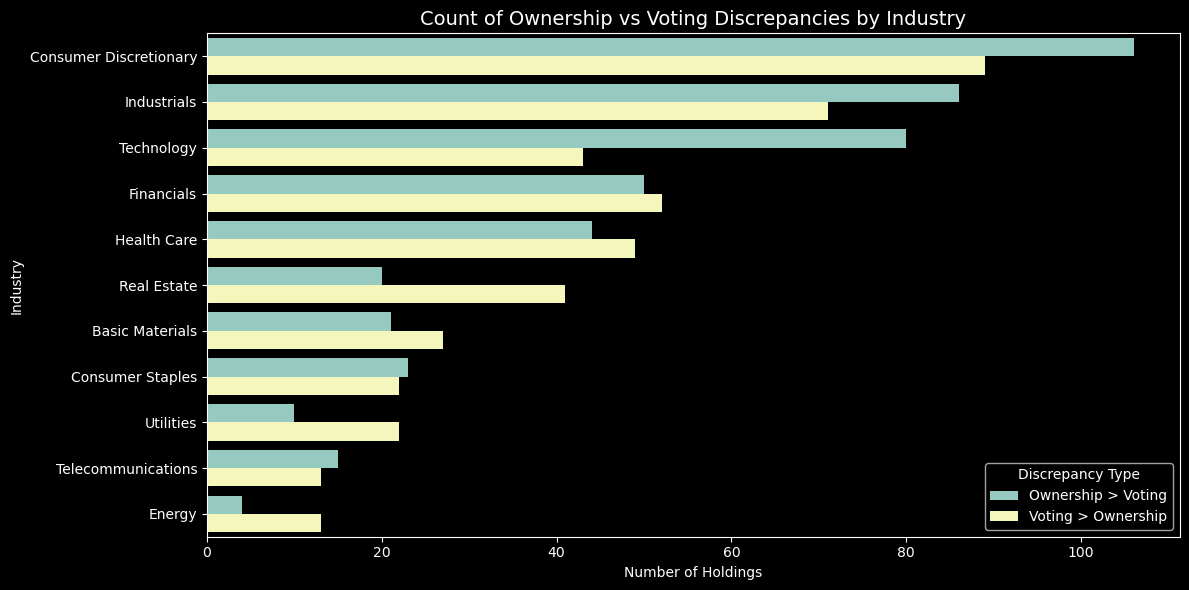

In [79]:
#  Count plot by Industry

plt.figure(figsize=(12,6))
sns.countplot(data=diff_vote_owned, y='Industry', hue='Discrepancy_Type', order=diff_vote_owned['Industry'].value_counts().index)
plt.title('Count of Ownership vs Voting Discrepancies by Industry', fontsize=14)
plt.xlabel('Number of Holdings')
plt.ylabel('Industry')
plt.legend(title='Discrepancy Type')
plt.tight_layout()
plt.show()

Industry Breakdown of Ownership–Voting Discrepancies:

The majority of discrepancies between ownership and voting rights are concentrated in a few sectors.  
Consumer Discretionary (~22.6%), Industrials (~18.4%), and Technology (~15.7%) together account for more than half of all cases.  
This pattern may reflect the prevalence of multi-class share structures and complex ownership models that are more common in large, innovation-driven or global consumer companies.


In [80]:
count = diff_vote_owned['Country'].value_counts()
pct = (count / count.sum()) * 100
pct

Country
United States           27.857936
China                   13.651498
France                  10.099889
Sweden                   8.990011
Taiwan                   4.661487
Italy                    4.550499
South Korea              3.440622
Canada                   2.885683
Japan                    2.330744
Brazil                   2.219756
Poland                   2.108768
Hong Kong                2.108768
Germany                  1.442841
Denmark                  1.331853
India                    1.220866
Mexico                   0.998890
Russia                   0.998890
Thailand                 0.998890
Australia                0.998890
United Kingdom           0.887902
Finland                  0.887902
Belgium                  0.776915
Malaysia                 0.554939
South Africa             0.554939
Switzerland              0.554939
Indonesia                0.332963
Spain                    0.332963
Sri Lanka                0.332963
New Zealand              0.221976
Colomb

In [ ]:
count=fund_2024.groupby('Country')['Market_Value_USD'].sum()
country_market_value_percentage = (count / count.sum()) * 100
country_market_value_percentage.sort_values(ascending=False).head(17)

Country
United States     54.714662
Japan              6.328589
United Kingdom     5.091178
Germany            3.542248
China              3.508865
Switzerland        3.081551
France             3.038944
Taiwan             2.362666
India              2.333999
Canada             2.185300
Netherlands        1.794137
Australia          1.599517
South Korea        1.376367
Sweden             1.147122
Spain              1.050234
Italy              1.024560
Denmark            0.887597
Name: Market_Value_USD, dtype: float64

Country Distribution of Portfolio vs Discrepancies

While the majority of Ownership–Voting discrepancies occur in U.S. holdings (~33%), the U.S. accounts for a much larger share of the fund's total portfolio (~55%).  
This indicates that discrepancies are **not strictly proportional to the portfolio weight** by country, suggesting they are driven more by corporate share structures than by investment size.


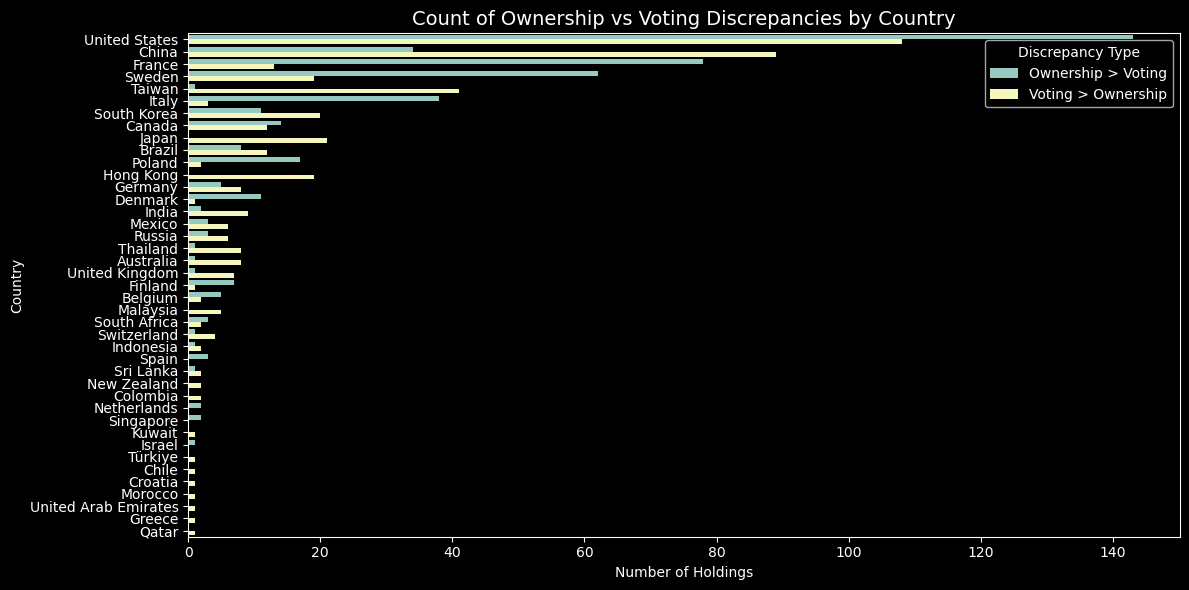

In [82]:
#Count plot by Country

plt.figure(figsize=(12,6))
sns.countplot(data=diff_vote_owned, y='Country', hue='Discrepancy_Type', order=diff_vote_owned['Country'].value_counts().index)
plt.title('Count of Ownership vs Voting Discrepancies by Country', fontsize=14)
plt.xlabel('Number of Holdings')
plt.ylabel('Country')
plt.legend(title='Discrepancy Type')
plt.tight_layout()
plt.show()

In [83]:
#Top 15 discrepancies by Portfolio Weight
diff_vote_owned.sort_values(by='Portfolio_Weight', ascending=False).head(30)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight,Discrepancy_Type
6938,Technology,North America,United States,Alphabet Inc,26165252659,0.860000,1.22,1.885207,Ownership > Voting
7469,Technology,North America,United States,Meta Platforms Inc,23028019765,0.560000,1.24,1.659169,Ownership > Voting
2979,Financials,North America,United States,Berkshire Hathaway Inc,10723223683,1.560000,0.54,0.772609,Voting > Ownership
6207,Industrials,North America,United States,Visa Inc,6970484330,1.150000,1.06,0.502224,Voting > Ownership
5549,Industrials,North America,United States,Mastercard Inc,6719438572,1.330000,1.32,0.484136,Voting > Ownership
4450,Health Care,Europe,Switzerland,Roche Holding AG,5837378741,0.080000,2.22,0.420583,Ownership > Voting
4352,Health Care,Europe,Denmark,Novo Nordisk A/S,5537177056,0.570000,1.79,0.398954,Ownership > Voting
8046,Telecommunications,Asia,South Korea,Samsung Electronics Co Ltd,4169102217,1.390000,1.63,0.300384,Ownership > Voting
6453,Real Estate,North America,United States,Digital Realty Trust Inc,3807485744,6.480000,6.36,0.274329,Voting > Ownership
7566,Technology,North America,United States,Palantir Technologies Inc,3566151375,0.810000,1.11,0.256941,Ownership > Voting


In [ ]:
#Top 15 holdings by Portfolio Weight
fund_2024.sort_values(by='Portfolio_Weight', ascending=False).head(15)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
7541,Technology,North America,United States,NVIDIA Corp,51074326579,1.32,1.32,3.679906
7477,Technology,North America,United States,Microsoft Corp,49861797013,1.35,1.35,3.592544
6961,Technology,North America,United States,Apple Inc,38344977557,1.25,1.25,2.762756
664,Consumer Discretionary,North America,United States,Amazon.com Inc,27280235373,1.17,1.17,1.965542
6938,Technology,North America,United States,Alphabet Inc,26165252659,0.86,1.22,1.885207
7469,Technology,North America,United States,Meta Platforms Inc,23028019765,0.56,1.24,1.659169
7029,Technology,North America,United States,Broadcom Inc,18353783949,1.42,1.42,1.322391
7759,Technology,Asia,Taiwan,Taiwan Semiconductor Manufacturing Co Ltd,17406706904,1.85,1.85,1.254154
1833,Consumer Discretionary,North America,United States,Tesla Inc,11692457234,1.14,1.14,0.842442
2979,Financials,North America,United States,Berkshire Hathaway Inc,10723223683,1.56,0.54,0.772609


In [ ]:
p_80_weight = fund_2024['Portfolio_Weight'].quantile(0.8)
p_80_weight_df = fund_2024[fund_2024['Portfolio_Weight'] >= p_80_weight]
p_80_weight_df.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
11,Basic Materials,North America,Canada,Agnico Eagle Mines Ltd,996265012,1.66,1.66,0.071781
14,Basic Materials,Europe,France,Air Liquide SA,2483622535,1.55,1.55,0.178945


In [86]:
p_80_weight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1675 entries, 11 to 8366
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          1675 non-null   object 
 1   Region            1675 non-null   object 
 2   Country           1675 non-null   object 
 3   Name              1675 non-null   object 
 4   Market_Value_USD  1675 non-null   int64  
 5   Voting            1675 non-null   float64
 6   Ownership         1675 non-null   float64
 7   Portfolio_Weight  1675 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.8+ KB


In [87]:
# Filtrar las filas de p_80_weight_df que también están en diff_vote_owned
high_weight_discrepancies = p_80_weight_df[p_80_weight_df['Name'].isin(diff_vote_owned['Name'])]

# Calcular porcentaje sobre el total del percentil 80
percentage = (len(high_weight_discrepancies) / len(p_80_weight_df)) * 100
print(f"Percentage of holdings in the top 20% by weight with Ownership-Voting discrepancies: {percentage:.2f}%")


Percentage of holdings in the top 20% by weight with Ownership-Voting discrepancies: 12.42%


Approximately 12% of the top 20% holdings by Portfolio Weight exhibit Ownership–Voting discrepancies.  
This suggests that these discrepancies are **not predominantly concentrated among the largest positions**, and likely have limited impact on the fund's overall portfolio composition.
